(lecture11:examples-expectation-discrete-rv)=
# Examples of expectations of discrete random variables

Let's revisit some of the distributions we encountered in [Lecture 9](lecture09) and calculate their
expectations.
We will do it both analytically, and using `scipy.stats`.

## Example: Expectation of a Bernoulli random variable

Take a [Bernoulli random variable](lecture09-bernoulli-distribution):

$$
X \sim \text{Bernoulli}(\theta).
$$

Then:

$$
\begin{split}
\mathbf{E}[X] &= \sum_x x p(x)\\
&= 0\cdot p(X=0) + 1\cdot p(X=1)\\
&= 0 \cdot (1-\theta) + 1\cdot \theta\\
&= \theta.
\end{split}
$$

And here is how we can do it using `scipy.stats`:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np
import scipy.stats as st

In [2]:
theta = 0.7
X = st.bernoulli(theta)

Now that we have made the random variable we can get its expectation by `X.expect()`:

In [3]:
print('E[X] = {0:1.2f}'.format(X.expect()))

E[X] = 0.70


Let's visualize the PMF and the expectation on the same plot:

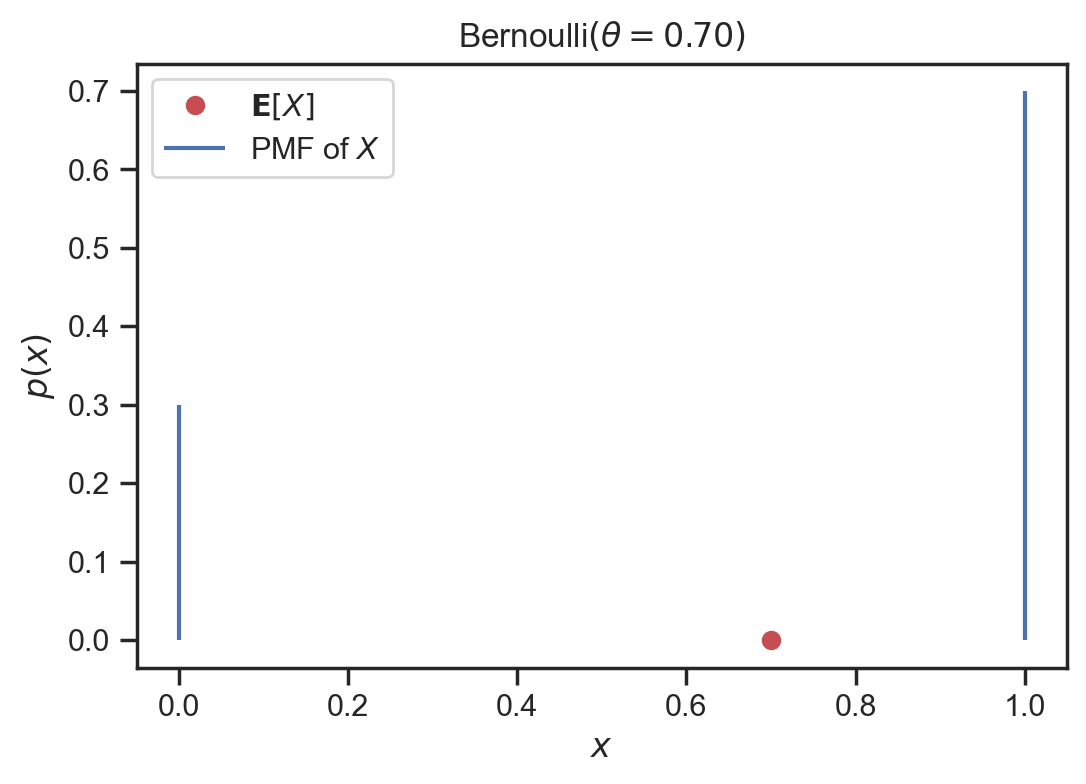

In [4]:
fig, ax = plt.subplots()
xs = np.arange(2)
ax.vlines(xs, 0, X.pmf(xs), label='PMF of $X$')
ax.plot(X.expect(), 0, 'ro', label='$\mathbf{E}[X]$')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.set_title(r'Bernoulli$(\theta={0:1.2f})$'.format(theta))
plt.legend(loc='upper left');

## Example: Expectation of a Categorical random variable

Take a [Categorical random variable](lecture09:categorical-distribution):

$$
X \sim \text{Categorical}(0.1, 0.3, 0.4, 0.2).
$$

The expectation is:

$$
\begin{split}
\mathbf{E}[X] &= \sum_x x p(x)\\
&= 0\cdot p(X=0) + 1 \cdot p(X=1) + 2\cdot p(X=2) + 3 \cdot p(X=3)\\
&= 0 \cdot 0.1 + 1 \cdot 0.3 + 2 \cdot 0.4 + 3 \cdot 0.2\\
&= 1.7.
\end{split}
$$

Here is how we can find it with Python:

In [5]:
import numpy as np
# The values X can take
xs = np.arange(4)
print('X values: ', xs)
# The probability for each value
ps = np.array([0.1, 0.3, 0.4, 0.2])
print('X probabilities: ', ps)
# And the expectation in a single line
E_X = np.sum(xs * ps)
print('E[X] = {0:1.2f}'.format(E_X))

X values:  [0 1 2 3]
X probabilities:  [0.1 0.3 0.4 0.2]
E[X] = 1.70


Alternatively, we could use `scipy.stats`:

In [6]:
X = st.rv_discrete(name='X', values=(xs, ps))
print('E[X] = {0:1.2f}'.format(X.expect()))

E[X] = 1.70


And a visualization:

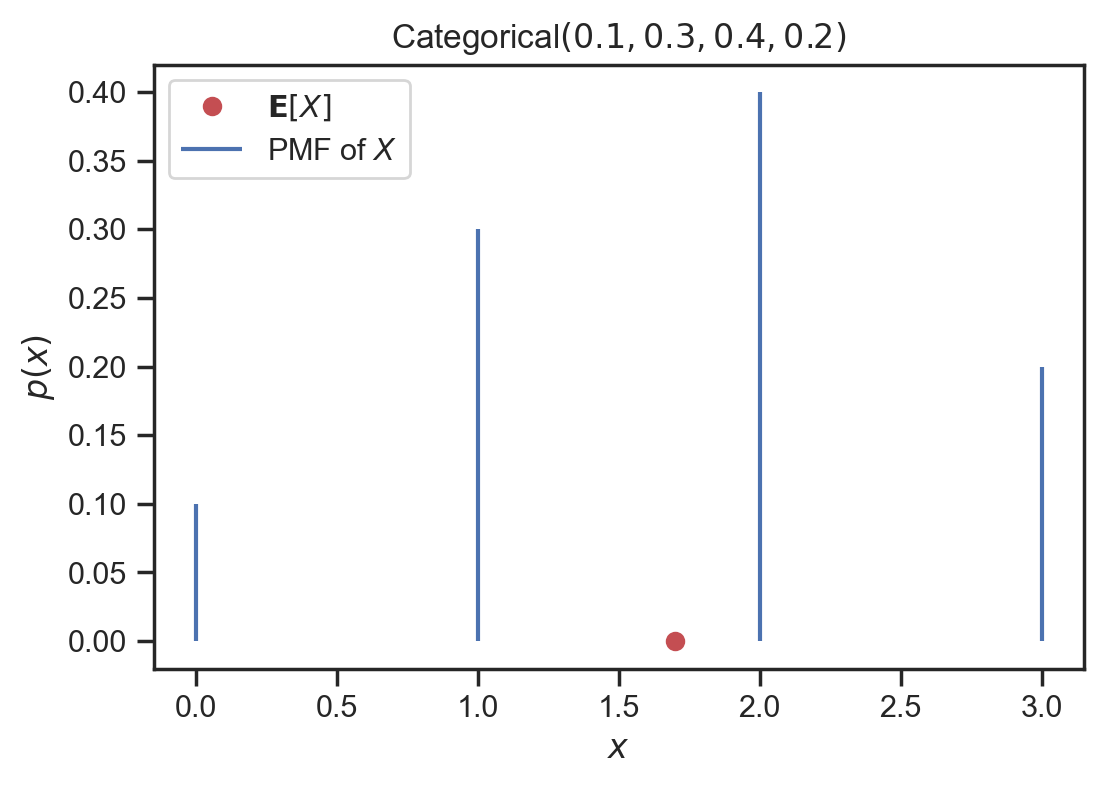

In [7]:
fig, ax = plt.subplots()
ax.vlines(xs, 0, X.pmf(xs), label='PMF of $X$')
ax.plot(X.expect(), 0, 'ro', label='$\mathbf{E}[X]$')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.set_title('Categorical$(0.1, 0.3, 0.4, 0.2)$'.format(theta))
plt.legend(loc='upper left');

## Example: Expectation of a Binomial random variable

Take a [Binomial random variable](lecture09:the-binomial-distribution):

$$
X\sim \text{Binomial}(n, \theta).
$$

The expectation is:

$$
\mathbf{E}[X] = n\theta.
$$

This makes sense.
Remember that $X$ is the number of successes in a binary experiment that is repeated $n$ times.
Each binary experiment has probability of success equal to $\theta$.

Here is how we can get it with `scipy.stats`:

In [8]:
n = 5       
theta = 0.6
X = st.binom(n, theta)
print('E[X] = {0:1.2f}'.format(X.expect()))
print('Compare to n * theta = {0:1.2f}'.format(n * theta))

E[X] = 3.00
Compare to n * theta = 3.00


Just like before, let's visualize the PMF, the mean, and put two markers on two standard deviations below and above the mean.

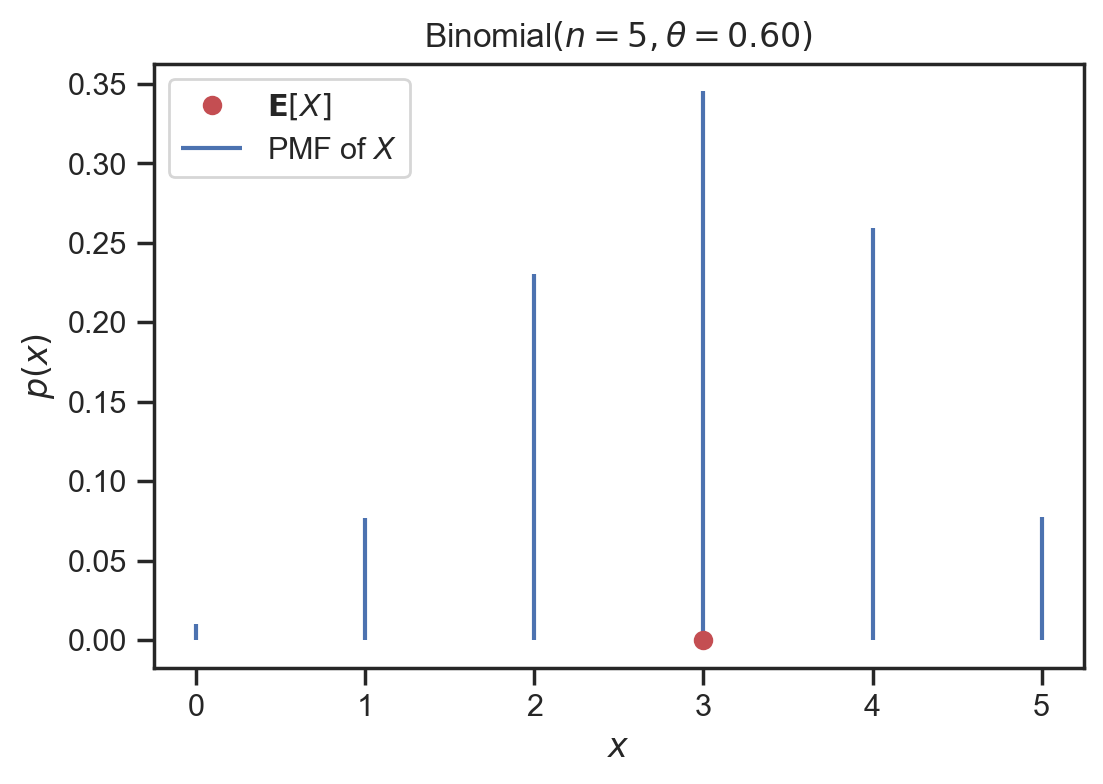

In [9]:
fig, ax = plt.subplots()
xs = np.arange(n+1)
ax.vlines(xs, 0, X.pmf(xs), label='PMF of $X$')
ax.plot(X.expect(), 0, 'ro', label='$\mathbf{E}[X]$')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.set_title(r'Binomial$(n={0:d}, \theta={1:1.2f})$'.format(n, theta))
plt.legend(loc='upper left');

### Questions

+ Rerun the case of the Binomial with $n=50$. Does the shape of the PMF you get look familiar?

## Example: Expectation of a Poisson random variable

Take [Poisson random variable](lecture09:the-poisson-distribution):

$$
X\sim \operatorname{Poisson}(\lambda).
$$

The expectation is:

$$
\begin{split}
\mathbf{E}[X] &= \sum_{k=0}^\infty k p(X=k)\\
&= \sum_{k=0}^\infty k \frac{\lambda^ke^{-\lambda}}{k!}.
\end{split}
$$

Again, with quite a bit of algebra you can show that:

$$
\mathbf{E}[X] = \lambda.
$$

Let's also do it in `scipy.stats`:

In [10]:
lam = 2.0
X = st.poisson(lam)
print('E[X] = {0:1.2f}'.format(X.expect()))

E[X] = 2.00


And let's visualize the PMF and the expectation together:

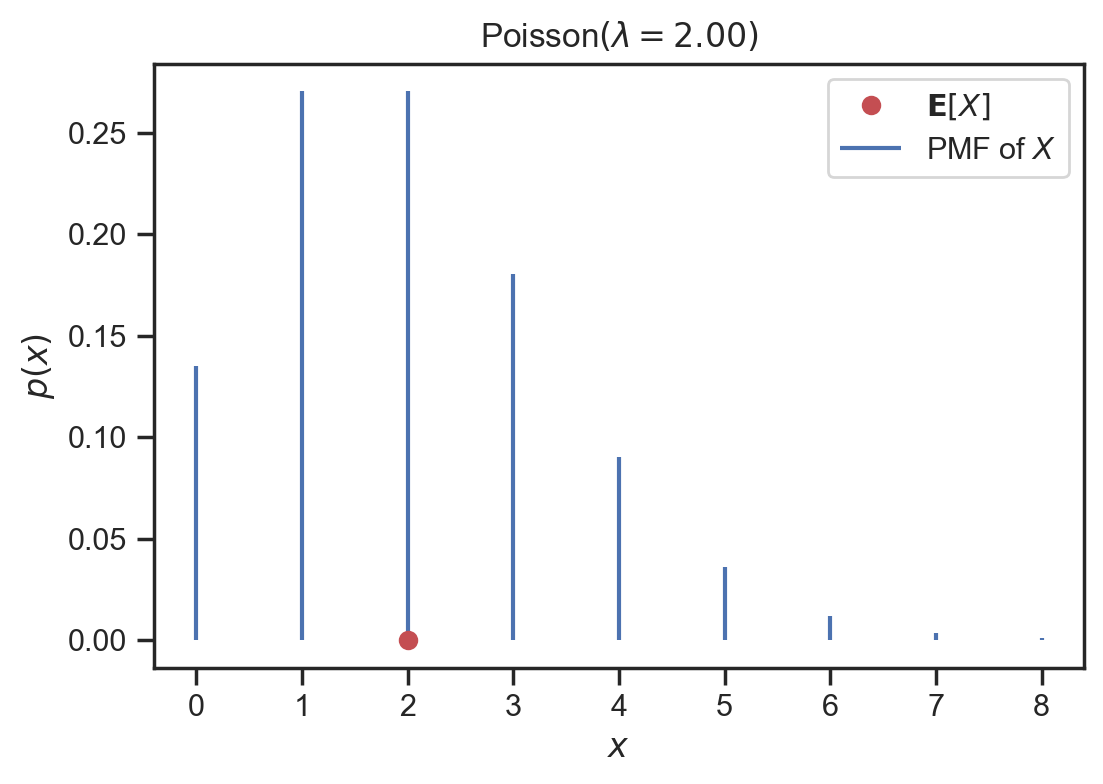

In [11]:
fig, ax = plt.subplots()
xs = np.arange(X.ppf(0.9999)) # I will explain this later
ax.vlines(xs, 0, X.pmf(xs), label='PMF of $X$')
ax.plot(X.expect(), 0, 'ro', label='$\mathbf{E}[X]$')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.set_title(r'Poisson$(\lambda={0:1.2f})$'.format(lam))
plt.legend(loc='upper right');

### Question

+ Rerun the case for the Poisson with a rate parameter $\lambda = 50$. Does the shape look familiar?